<h3>DEFINING THE DATA</h3>

In [2]:
import pandas as pd
import numpy as np
# Create the expanded class dataset
data = {
    "Roll No": list(range(1, 25)),
    "Age": [14, 15, 14, 16, 15, 
            14, 15, 16, 14, 15, 
            14, 15, np.nan, 16, 15, 
            14, 15, 16, 14, 15, 
            14, 15, 15, 16],
    "Gender": ["Female", "Male", "Female", "Male", "Female", 
               "Male", "Female", "Male", "Female", "Male",
               "Female", "Male", "Female", "Male", "Female", 
               "Male", "Female", "Male", "Female", "Male",
               "Female", "Male", "Female", "Male"],
    "Height (cm)": [150, 160, 155, 165, 158, 
                    162, 157, 170, 152, 164, 
                    165, 160, 154, np.nan, 159, 
                    161, 156, 173, 153, 168,
                    210, 120, 140, 180],  # Outliers added
    "Weight (kg)": [50, 55, 52, 65, 54, 
                    60, 53, 70, 48, 64, 
                    np.nan, 58, 51, 68, 55, 
                    62, 50, 72, np.nan, 66,
                    100, 30, 45, 90],  # Outliers added
    "BMI": [22.2, 21.5, 21.6, 23.9, 21.6, 
            22.8, 21.5, 24.2, 20.8, 23.8, 
            24.1, np.nan, 21.4, 24.4, 21.7, 
            23.7, 20.6, 24.0, 21.1, 23.4,
            27.7, 20.8, 22.0, 27.8],  # BMI for outliers
    "Scores": [85, 78, 90, 75, 88, 
               80, 92, 70, 95, 77, 
               89, 82, 94, 76, np.nan, 
               81, 90, 74, 88, 79,
               50, 95, 80, 60],  # Scores for outliers
}
# Create DataFrame
class_df = pd.DataFrame(data)
# Function to classify body type based on BMI
def classify_body_type(bmi):
    if pd.isna(bmi):
        return "Unknown"
    elif bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 24.9:
        return "Normal"
    elif 25 <= bmi < 29.9:
        return "Overweight"
    else:
        return "Obese"
# Adding Body Type column
class_df['Body Type'] = class_df['BMI'].apply(classify_body_type)
# Display the updated DataFrame
print(class_df)

    Roll No   Age  Gender  Height (cm)  Weight (kg)   BMI  Scores   Body Type
0         1  14.0  Female        150.0         50.0  22.2    85.0      Normal
1         2  15.0    Male        160.0         55.0  21.5    78.0      Normal
2         3  14.0  Female        155.0         52.0  21.6    90.0      Normal
3         4  16.0    Male        165.0         65.0  23.9    75.0      Normal
4         5  15.0  Female        158.0         54.0  21.6    88.0      Normal
5         6  14.0    Male        162.0         60.0  22.8    80.0      Normal
6         7  15.0  Female        157.0         53.0  21.5    92.0      Normal
7         8  16.0    Male        170.0         70.0  24.2    70.0      Normal
8         9  14.0  Female        152.0         48.0  20.8    95.0      Normal
9        10  15.0    Male        164.0         64.0  23.8    77.0      Normal
10       11  14.0  Female        165.0          NaN  24.1    89.0      Normal
11       12  15.0    Male        160.0         58.0   NaN    82.

<h2>Processing</h2>

In [3]:
class_df
class_df['Age'].to_numeric(s, downcast="integer")


AttributeError: 'Series' object has no attribute 'to_numeric'

In [4]:
import matplotlib.pyplot as plt

<h1>Histogram of Age
</h1>

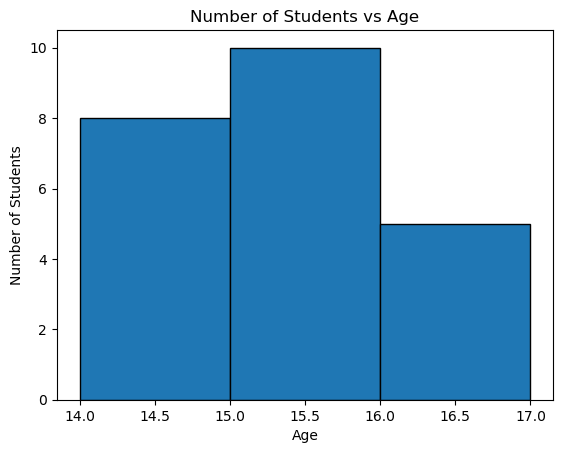

In [27]:
df=class_df
df['Age'].fillna(0).astype('int')


plt.hist(df['Age'], bins=[14, 15, 16, 17], edgecolor='black')
plt.title("Number of Students vs Age")
plt.xlabel("Age")
plt.ylabel("Number of Students")
plt.show()

([<matplotlib.axis.XTick at 0x2d1c14e2f30>], [Text(1, 0, 'Students')])

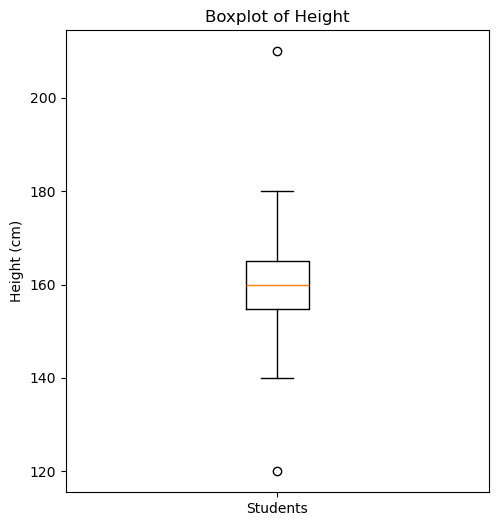

In [32]:
class_df['Height (cm)'] = class_df['Height (cm)'].fillna(class_df['Height (cm)'].mean())
class_df['Weight (kg)'] = class_df['Weight (kg)'].fillna(class_df['Weight (kg)'].mean())

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a boxplot for Height
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.boxplot(class_df['Height (cm)'], vert=True)
plt.title("Boxplot of Height")
plt.ylabel("Height (cm)")
plt.xticks([1], ['Students'])  # Label for x-axis

{'whiskers': [<matplotlib.lines.Line2D at 0x2d1c172fb00>,
 'caps': [<matplotlib.lines.Line2D at 0x2d1c1482210>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d1c172f800>],
 'medians': [<matplotlib.lines.Line2D at 0x2d1c14827e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d1c1482ae0>],
 'means': []}

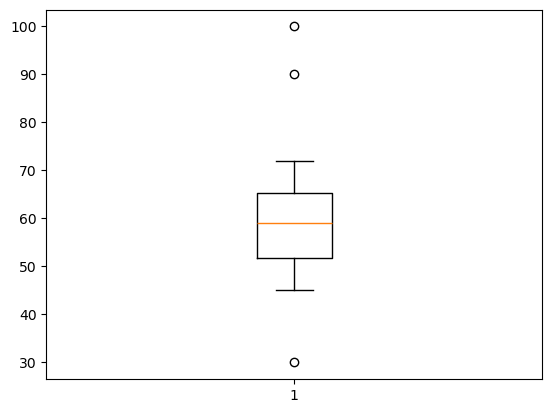

In [36]:
df['Weight (kg)']=df['Weight (kg)'].fillna(df['Weight (kg)'].mean())
plt.boxplot(df['Weight (kg)'],vert=True)
import seaborn as sns


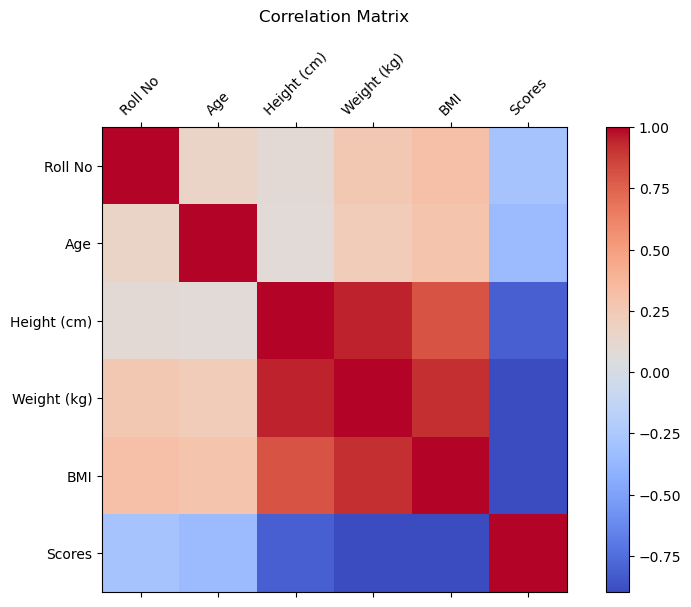

In [41]:
correlation_matrix = class_df.select_dtypes(include=[np.number]).corr()

# Step 2: Visualize the correlation matrix using plt
plt.figure(figsize=(10, 6))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.title("Correlation Matrix", pad=20)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()